# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1218.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           8.24e-44
Time:                        12:50:50   Log-Likelihood:                 7.3314
No. Observations:                  50   AIC:                            -6.663
Df Residuals:                      46   BIC:                            0.9854
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0572      0.074     68.103      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.63121867  5.11722682  5.56073051  5.93095327  6.20822572  6.38721715
  6.47781137  6.50348279  6.49743969  6.49716815  6.53827322  6.64862912
  6.84379952  7.12448057  7.47638645  7.87259651  8.27797828  8.65495961
  8.96970165  9.19765855  9.32761017  9.36350563  9.32381437  9.23849176
  9.14405748  9.07759543  9.07066098  9.14409649  9.30460697  9.54365848
  9.83888023 10.15774    10.46288917 10.71829889 10.89517963 10.97671113
 10.96080594 10.86045243 10.70158078 10.51880275 10.34972507 10.22877075
 10.18152347 10.22052429 10.34321114 10.53233979 10.75881703 10.98648059
 11.17804051 11.30120575]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.32778338 11.20801776 10.96405489 10.64636262 10.32137444 10.0552242
  9.89755425  9.86936125  9.95785548 10.11959219]


## Plot comparison

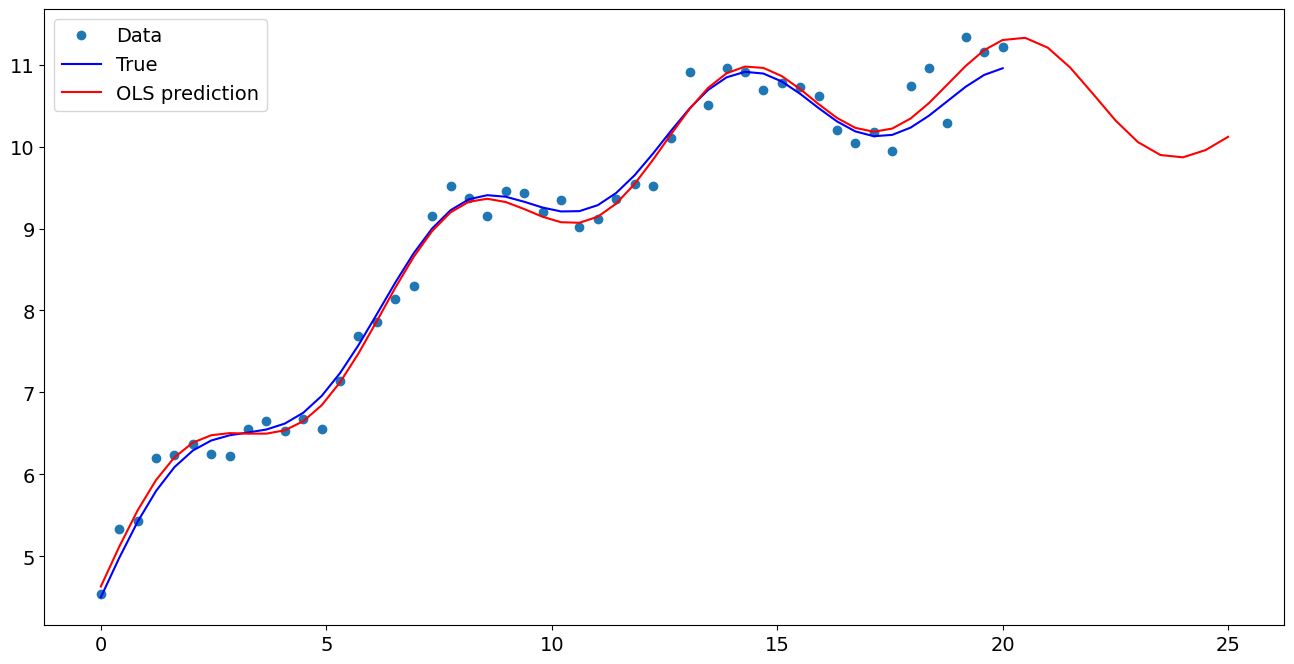

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.057204
x1                  0.478116
np.sin(x1)          0.564715
I((x1 - 5) ** 2)   -0.017039
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.327783
1    11.208018
2    10.964055
3    10.646363
4    10.321374
5    10.055224
6     9.897554
7     9.869361
8     9.957855
9    10.119592
dtype: float64